<a href="https://colab.research.google.com/github/Leonnello/CSS123L-SA2-REAL-ESTATE/blob/patch-1/ITS150L_SA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ITS150L_FOPI01_1Q2425<br>
Members:<br>
Celina Therese Tabano<br>
Noel Allen Elises

In [ ]:
class Process:
  position = None

  def __init__(self, pid, burst_time, memory_size):
    self.pid = pid
    self.burst_time = burst_time
    self.memory_size = memory_size


In [ ]:
class MemoryBlock:
  def __init__(self, start, end, isFree: bool = True):
    self.start = start
    self.end = end
    self.isFree = isFree

  def get_size(self):
    return self.end - self.start + 1

In [ ]:
##### GLOBAL VARIABLES
# counter for pid
pid_count = 1

# array of all process to be scheduled
current_processes = []

# memory size and array for all memory blocks
main_memory_size = 0
memory_blocks = []


In [ ]:
# function to input new jobs to queue
# prolly on a different process/fork?
def new_job():
  global pid_count
  while True:
    try:
      burst_time = int(input(f"Enter process#{pid_count} burst time: "))
      memory_size = int(input(f"Enter process#{pid_count} memory size: "))
      current_processes.append(Process(pid_count,burst_time, memory_size))
      pid_count += 1
      break
    except ValueError:
      print("Invalid input. Enter whole numbers only.")

In [ ]:
# function to send current_processes for sjf scheduling
# run this whenever all the processes in a sjf batch is complete?
def sjf_scheduling(processes):
  # clear array for next batch
  global current_processes
  current_processes.clear()

  # sort processes based on Burst Time
  processes = sorted(processes, key=lambda process: process.burst_time)

  # get total wt and tat
  # TO REMOVE LATER
  wt,  tat = [], []
  total_wt, total_tat = 0, 0

  for i in range(len(processes)):
    #repaint()

    #compact()

    #coalesce()

    if (i == 0):
      wt.append(0)
      tat.append( processes[i].burst_time)
    else:
      wt.append( processes[i-1].burst_time + wt[i-1] )
      tat.append( processes[i].burst_time + wt[i] )

    total_wt += wt[i]
    total_tat += tat[i]

  for i in range(len(processes)):
    print(f"PID {processes[i].pid}: {processes[i].burst_time}ms {processes[i].memory_size}Kb")

  print("Average WT: ", total_wt/len(processes))
  print("Average TAT: ", total_tat/len(processes))

In [ ]:
def best_fit(memory_block):
  # loop through memory_blocks []
  # get the smallest difference
  # put process in memory_block, set size to process.memory_size
  # create new memory_block for the remaining hole

  global memory_blocks

  pass

In [ ]:
def is_in_array(array, element, *args) -> bool:
  for n in range(len(array)):
    match args:
      case ("start","end"):
        if array[n].start == element.start and array[n].end == element.end:
          return True

  return False

In [ ]:
# coalesce
def coalesce():
  global memory_blocks
  coalesced_blocks = []

  # sort by start #
  memory_blocks = sorted(memory_blocks, key=lambda block: block.start)

  if len(memory_blocks) == 1:
    coalesced_blocks = memory_blocks
  else:
    prev = None
    for i in range(len(memory_blocks) - 1):
      current = memory_blocks[i]
      next = memory_blocks[i+1]

      if prev is not None:
        # if previous was merged, update current
        if prev.isFree and prev.end == current.end:
          current = prev

      if current.isFree and next.isFree:
        # if prev is current, meaning prev and current will be merged
        # delete duplicate from final array
        if prev is current:
          coalesced_blocks.pop()

        current.end = next.end

      if not is_in_array(coalesced_blocks, current, "start", "end"):
        coalesced_blocks.append(current)

      if i == len(memory_blocks) - 2:
        if not is_in_array(coalesced_blocks, next, "start", "end"):
          coalesced_blocks.append(next)

      prev = current

  memory_blocks = coalesced_blocks.copy()

  for i in range(len(memory_blocks)):
    print(f"[{memory_blocks[i].start}, {memory_blocks[i].end}] {memory_blocks[i].isFree}")

In [ ]:
def compact():
  #if time&20==0
  #place job based on strategy (if has space)
  #choose job based on scheduling
  #reduce time of chosen job, time++
  print('asdf')

In [ ]:
def main():
  global current_processes, pid_count
  global main_memory_size, memory_blocks
  global time

  # for x in range(5):
  #   new_job()

  #current_processes.append(Process(pid_count,40, 40))
  #pid_count += 1
  #current_processes.append(Process(pid_count,43, 43))
  #pid_count += 1
  #current_processes.append(Process(pid_count,66, 66))
  #pid_count += 1
  #current_processes.append(Process(pid_count,50, 50))
  #pid_count += 1
  #current_processes.append(Process(pid_count,55, 55))
  #pid_count += 1

  memory_blocks.append(MemoryBlock(0,99))
  memory_blocks.append(MemoryBlock(100,149))
  memory_blocks.append(MemoryBlock(150,199))
  memory_blocks.append(MemoryBlock(200,249, False))
  memory_blocks.append(MemoryBlock(250,349))
  memory_blocks.append(MemoryBlock(350,500, False))

  # compact()
  coalesce()
  #placeProcess()




  # sjf_scheduling(current_processes.copy())

main()

[0, 199] True
[200, 249] False
[250, 349] True
[350, 500] False


--------------------------------------------------------------------------------

In [ ]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, clear_output
import time

In [ ]:
#part of static() - repaints static visuals
def repaintStatic(drawObj):
  # Set font (optional, use default if not available)
  try:
      font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 24)
  except IOError:
      font = ImageFont.load_default()

  # Draw the rectangle (outline only, no fill)
  drawObj.rectangle([(50, 50), (1000, 250)], outline="black", width=5)

  # Add text/label inside the rectangle
  text = "Memory"
  text_position = (50, 35)  # Position where the text will be placed

  # Add text to the image
  drawObj.text(text_position, text, fill="black", font=font)

In [ ]:
memory_blocks.clear()
memory_blocks.append(MemoryBlock(0,99))
memory_blocks.append(MemoryBlock(100,149))
memory_blocks.append(MemoryBlock(150,199))
memory_blocks.append(MemoryBlock(200,249, False))
memory_blocks.append(MemoryBlock(250,349))
memory_blocks.append(MemoryBlock(350,499, False))


In [ ]:
#updates image with the changes in memory_blocks array
# canvas init
image = Image.new("RGB", (1000, 300), color="white")
#create object that contains the canvas
drawObj = ImageDraw.Draw(image)
def repaint():
  global memory_blocks
  currentPos = (50, 50)



  repaintStatic(drawObj)
  #display(image)

  for block in memory_blocks:
    # print(currentPos)
    # print(p2)
    # print()
    p2 = (currentPos[0] + block.get_size(), 250)

    drawObj.rectangle([currentPos, p2], outline="blue", width=2)

    #increment pointer with block size
    currentPos = (currentPos[0] + block.get_size(), currentPos[1])

    clear_output(wait=True)
    display(image)
    #frame rate
    time.sleep(0.5)

  print("repaint complete.")

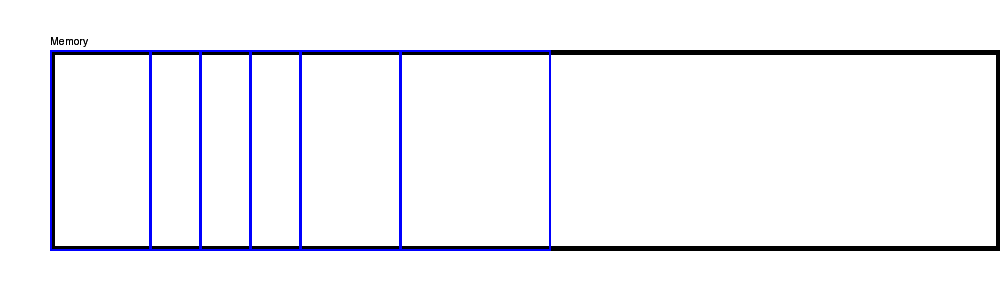

repaint complete.


In [ ]:
repaint()